# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [ ]:
# %pip install --upgrade plotly

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [377]:
print(f"Dataset contains: {df_data.shape[0]} rows and {df_data.shape[1]} columns")

Dataset contains: 962 rows and 16 columns


In [378]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [9]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme  1839-03-16              Paris   
2    Individual        Emil Adolf von Behring  1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy  1822-05-20              Paris   
4    Individual             Jean Henry Dunant  1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

In [10]:
df_data.tail()

year  category                                           prize  \
957  2020  Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020     Peace                      The Nobel Peace Prize 2020   
959  2020   Physics                 The Nobel Prize in Physics 2020   
960  2020   Physics                 The Nobel Prize in Physics 2020   
961  2020   Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                   full_name  birth_date  \
957    Individual            Michael Houghton  1949-07-02   
958  Organization  World Food Programme (WFP)         NaN   
959    Individual                 Andrea Ghez  1965-06-16   
960    Individual             Reinhard Genzel  1952-03-24   
961    Individual               Roger Penrose  1931-08-08   

                   birth_city             birth_country  \
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization_city      organization_country  ISO  
957          Edmonton                    Canada  GBR  
958               NaN                       NaN  NaN  
959      Berkeley, CA  United States of America  USA  
960   Los Angeles, CA  United States of America  DEU  
961            Oxford            United Kingdom  GBR

In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [13]:
df_data.sort_values(by='year').head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme  1839-03-16              Paris   
2    Individual        Emil Adolf von Behring  1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy  1822-05-20              Paris   
4    Individual             Jean Henry Dunant  1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

In [379]:
print(f"The first time the Nobel Prize was awarded was: {df_data['year'].min()}")
print(f"The latest Year in the dataset is: {df_data['year'].max()}")

The first time the Nobel Prize was awarded was: 1901
The latest Year in the dataset is: 2020


### Check for Duplicates

In [380]:
print(f'Are there any duplicate rows? {df_data.duplicated().values.any()}')

Are there any duplicate rows? False


In [381]:
print(f'Are there any NaN values? {df_data.isna().values.any()}')

Are there any NaN values? True


In [382]:
df_data.count() # count only not NaN Values

year                     962
category                 962
prize                    962
motivation               874
prize_share              962
laureate_type            962
full_name                962
birth_date               934
birth_city               931
birth_country            934
birth_country_current    934
sex                      934
organization_name        707
organization_city        707
organization_country     708
ISO                      934
dtype: int64

### Check for NaN Values

In [150]:
df_data.isna().sum() #count how many Nan vaues have each column

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
share_pct                  0
dtype: int64

In [6]:
nan_col = ['year', 'category', 'laureate_type', 'birth_date', 'full_name', 'organization_name']
df_data.loc[df_data['birth_date'].isna()][nan_col] #Organization does not have birth date

year category laureate_type birth_date  \
24   1904    Peace  Organization        NaN   
60   1910    Peace  Organization        NaN   
89   1917    Peace  Organization        NaN   
200  1938    Peace  Organization        NaN   
215  1944    Peace  Organization        NaN   
237  1947    Peace  Organization        NaN   
238  1947    Peace  Organization        NaN   
283  1954    Peace  Organization        NaN   
348  1963    Peace  Organization        NaN   
349  1963    Peace  Organization        NaN   
366  1965    Peace  Organization        NaN   
399  1969    Peace  Organization        NaN   
479  1977    Peace  Organization        NaN   
523  1981    Peace  Organization        NaN   
558  1985    Peace  Organization        NaN   
588  1988    Peace  Organization        NaN   
659  1995    Peace  Organization        NaN   
682  1997    Peace  Organization        NaN   
703  1999    Peace  Organization        NaN   
730  2001    Peace  Organization        NaN   
778  2005    Peace  Organization        NaN   
788  2006    Peace  Organization        NaN   
801  2007    Peace  Organization        NaN   
860  2012    Peace  Organization        NaN   
873  2013    Peace  Organization        NaN   
897  2015    Peace  Organization        NaN   
919  2017    Peace  Organization        NaN   
958  2020    Peace  Organization        NaN   

                                             full_name organization_name  
24   Institut de droit international (Institute of ...               NaN  
60   Bureau international permanent de la Paix (Per...               NaN  
89   Comité international de la Croix Rouge (Intern...               NaN  
200  Office international Nansen pour les Réfugiés ...               NaN  
215  Comité international de la Croix Rouge (Intern...               NaN  
237   American Friends Service Committee (The Quakers)               NaN  
238              Friends Service Council (The Quakers)               NaN  
283  Office of the United Nations High Commissioner...               NaN  
348  Comité international de la Croix Rouge (Intern...               NaN  
349  Ligue des Sociétés de la Croix-Rouge (League o...               NaN  
366            United Nations Children's Fund (UNICEF)               NaN  
399         International Labour Organization (I.L.O.)               NaN  
479                              Amnesty International               NaN  
523  Office of the United Nations High Commissioner...               NaN  
558  International Physicians for the Prevention of...               NaN  
588                 United Nations Peacekeeping Forces               NaN  
659   Pugwash Conferences on Science and World Affairs               NaN  
682     International Campaign to Ban Landmines (ICBL)               NaN  
703                           Médecins Sans Frontières               NaN  
730                              United Nations (U.N.)               NaN  
778          International Atomic Energy Agency (IAEA)               NaN  
788                                       Grameen Bank               NaN  
801   Intergovernmental Panel on Climate Change (IPCC)               NaN  
860                                European Union (EU)               NaN  
873  Organisation for the Prohibition of Chemical W...               NaN  
897                          National Dialogue Quartet               NaN  
919  International Campaign to Abolish Nuclear Weap...               NaN  
958                         World Food Programme (WFP)               NaN

In [7]:
df_data.loc[df_data['organization_name'].isna()][nan_col] # Winners do not associated with organizations

year    category laureate_type  birth_date  \
1    1901  Literature    Individual  1839-03-16   
3    1901       Peace    Individual  1822-05-20   
4    1901       Peace    Individual  1828-05-08   
7    1902  Literature    Individual  1817-11-30   
9    1902       Peace    Individual  1843-05-21   
..    ...         ...           ...         ...   
932  2018       Peace    Individual  1993-07-02   
942  2019  Literature    Individual  1942-12-06   
946  2019       Peace    Individual  1976-08-15   
954  2020  Literature    Individual  1943-04-22   
958  2020       Peace  Organization         NaN   

                              full_name organization_name  
1                       Sully Prudhomme               NaN  
3                        Frédéric Passy               NaN  
4                     Jean Henry Dunant               NaN  
7    Christian Matthias Theodor Mommsen               NaN  
9                  Charles Albert Gobat               NaN  
..                                  ...               ...  
932                         Nadia Murad               NaN  
942                        Peter Handke               NaN  
946                      Abiy Ahmed Ali               NaN  
954                        Louise Glück               NaN  
958          World Food Programme (WFP)               NaN  

[255 rows x 6 columns]

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [8]:
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'])
type(df_data['birth_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

#### Add a Column with the Prize Share as a Percentage

In [9]:
new_values = df_data['prize_share'].str.split('/', expand=True)
new_values

0  1
0    1  1
1    1  1
2    1  1
3    1  2
4    1  2
..  .. ..
957  1  3
958  1  1
959  1  4
960  1  4
961  1  2

[962 rows x 2 columns]

In [10]:
first_val = pd.to_numeric(new_values[0])
second_val = pd.to_numeric(new_values[1])
df_data['share_pct'] = first_val/second_val
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00  
1               NaN                  NaN  FRA       1.00  
2           Marburg              Germany  POL       1.00  
3               NaN                  NaN  FRA       0.50  
4               NaN                  NaN  CHE       0.50

In [389]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [11]:
prize_by_genre = df_data['sex'].value_counts()
prize_by_genre

sex
Male      876
Female     58
Name: count, dtype: int64

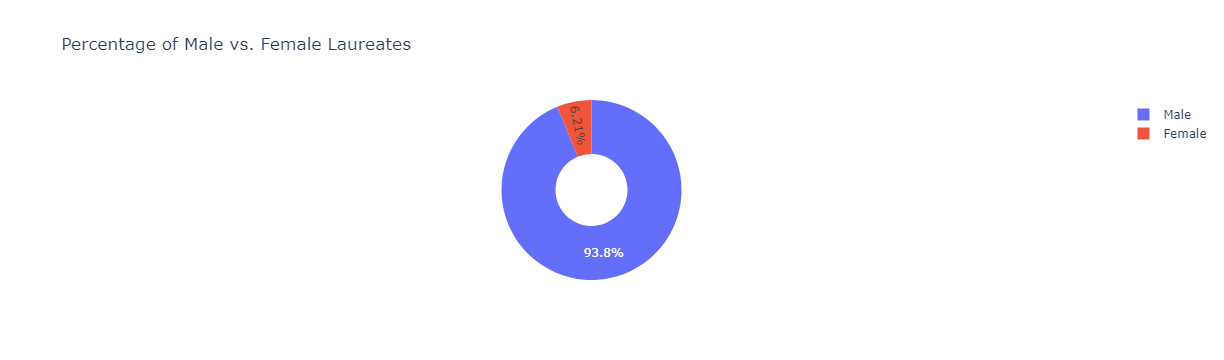

In [12]:
donut = px.pie(labels=prize_by_genre.index, 
               values=prize_by_genre.values, 
               title='Percentage of Male vs. Female Laureates', 
               names=prize_by_genre.index, 
               hole=0.4)
donut.update_traces(textposition='inside', textinfo='percent', textfont_size=12)
donut.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [13]:
female_winners = df_data[df_data['sex'] == 'Female']
female_winners.head(3)

year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation prize_share  \
18  "in recognition of the extraordinary services ...         1/4   
29                                                NaN         1/1   
51  "in appreciation of the lofty idealism, vivid ...         1/1   

   laureate_type                                          full_name  \
18    Individual                        Marie Curie, née Sklodowska   
29    Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51    Individual                      Selma Ottilia Lovisa Lagerlöf   

   birth_date birth_city                     birth_country  \
18 1867-11-07     Warsaw           Russian Empire (Poland)   
29 1843-06-09     Prague  Austrian Empire (Czech Republic)   
51 1858-11-20   Mårbacka                            Sweden   

   birth_country_current     sex organization_name organization_city  \
18                Poland  Female               NaN               NaN   
29        Czech Republic  Female               NaN               NaN   
51                Sweden  Female               NaN               NaN   

   organization_country  ISO  share_pct  
18                  NaN  POL       0.25  
29                  NaN  CZE       1.00  
51                  NaN  SWE       1.00

In [14]:
female_winners[['category', 'full_name', 'birth_country', 'organization_name']].head(3)

category                                          full_name  \
18     Physics                        Marie Curie, née Sklodowska   
29       Peace  Baroness Bertha Sophie Felicita von Suttner, n...   
51  Literature                      Selma Ottilia Lovisa Lagerlöf   

                       birth_country organization_name  
18           Russian Empire (Poland)               NaN  
29  Austrian Empire (Czech Republic)               NaN  
51                            Sweden               NaN

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [15]:
winners = df_data.duplicated(subset=['full_name'], keep=False) #keep the duplicated values, find duplicated by only full_name
mult_winners = df_data[winners] # extract the duplicated winners in the dataframe
mult_winners

year   category                              prize  \
18   1903    Physics    The Nobel Prize in Physics 1903   
62   1911  Chemistry  The Nobel Prize in Chemistry 1911   
89   1917      Peace         The Nobel Peace Prize 1917   
215  1944      Peace         The Nobel Peace Prize 1944   
278  1954  Chemistry  The Nobel Prize in Chemistry 1954   
283  1954      Peace         The Nobel Peace Prize 1954   
297  1956    Physics    The Nobel Prize in Physics 1956   
306  1958  Chemistry  The Nobel Prize in Chemistry 1958   
340  1962      Peace         The Nobel Peace Prize 1962   
348  1963      Peace         The Nobel Peace Prize 1963   
424  1972    Physics    The Nobel Prize in Physics 1972   
505  1980  Chemistry  The Nobel Prize in Chemistry 1980   
523  1981      Peace         The Nobel Peace Prize 1981   

                                            motivation prize_share  \
18   "in recognition of the extraordinary services ...         1/4   
62   "in recognition of her services to the advance...         1/1   
89                                                 NaN         1/1   
215                                                NaN         1/1   
278  "for his research into the nature of the chemi...         1/1   
283                                                NaN         1/1   
297  "for their researches on semiconductors and th...         1/3   
306  "for his work on the structure of proteins, es...         1/1   
340                                                NaN         1/1   
348                                                NaN         1/2   
424  "for their jointly developed theory of superco...         1/3   
505  "for their contributions concerning the determ...         1/4   
523                                                NaN         1/1   

    laureate_type                                          full_name  \
18     Individual                        Marie Curie, née Sklodowska   
62     Individual                        Marie Curie, née Sklodowska   
89   Organization  Comité international de la Croix Rouge (Intern...   
215  Organization  Comité international de la Croix Rouge (Intern...   
278    Individual                                 Linus Carl Pauling   
283  Organization  Office of the United Nations High Commissioner...   
297    Individual                                       John Bardeen   
306    Individual                                   Frederick Sanger   
340    Individual                                 Linus Carl Pauling   
348  Organization  Comité international de la Croix Rouge (Intern...   
424    Individual                                       John Bardeen   
505    Individual                                   Frederick Sanger   
523  Organization  Office of the United Nations High Commissioner...   

    birth_date    birth_city             birth_country  \
18  1867-11-07        Warsaw   Russian Empire (Poland)   
62  1867-11-07        Warsaw   Russian Empire (Poland)   
89         NaT           NaN                       NaN   
215        NaT           NaN                       NaN   
278 1901-02-28  Portland, OR  United States of America   
283        NaT           NaN                       NaN   
297 1908-05-23   Madison, WI  United States of America   
306 1918-08-13     Rendcombe            United Kingdom   
340 1901-02-28  Portland, OR  United States of America   
348        NaT           NaN                       NaN   
424 1908-05-23   Madison, WI  United States of America   
505 1918-08-13     Rendcombe            United Kingdom   
523        NaT           NaN                       NaN   

        birth_country_current     sex  \
18                     Poland  Female   
62                     Poland  Female   
89                        NaN     NaN   
215                       NaN     NaN   
278  United States of America    Male   
283                       NaN     NaN   
297  United States of America    Male   
306            United Kingdom    Male   
340  U

In [16]:
print(f"There are {mult_winners['full_name'].nunique()} multiple winners")
mult_winners[['year', 'category', 'laureate_type', 'full_name']]

There are 6 multiple winners


year   category laureate_type  \
18   1903    Physics    Individual   
62   1911  Chemistry    Individual   
89   1917      Peace  Organization   
215  1944      Peace  Organization   
278  1954  Chemistry    Individual   
283  1954      Peace  Organization   
297  1956    Physics    Individual   
306  1958  Chemistry    Individual   
340  1962      Peace    Individual   
348  1963      Peace  Organization   
424  1972    Physics    Individual   
505  1980  Chemistry    Individual   
523  1981      Peace  Organization   

                                             full_name  
18                         Marie Curie, née Sklodowska  
62                         Marie Curie, née Sklodowska  
89   Comité international de la Croix Rouge (Intern...  
215  Comité international de la Croix Rouge (Intern...  
278                                 Linus Carl Pauling  
283  Office of the United Nations High Commissioner...  
297                                       John Bardeen  
306                                   Frederick Sanger  
340                                 Linus Carl Pauling  
348  Comité international de la Croix Rouge (Intern...  
424                                       John Bardeen  
505                                   Frederick Sanger  
523  Office of the United Nations High Commissioner...

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [17]:
df_data['category'].nunique()

6

In [18]:
total_by_category = df_data['category'].value_counts()
total_by_category

category
Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: count, dtype: int64

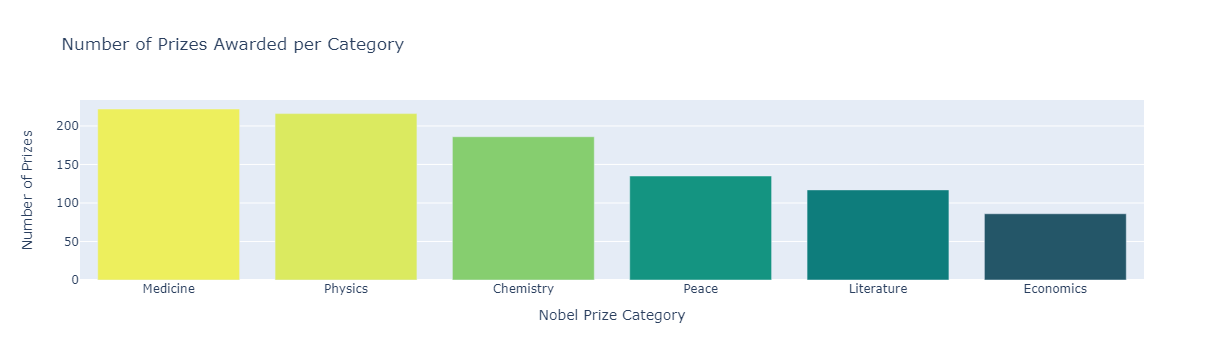

In [19]:
bar = px.bar(data_frame=total_by_category, 
             x=total_by_category.index, 
             y=total_by_category.values,
             color=total_by_category.values, 
             color_continuous_scale='aggrnyl', 
             title='Number of Prizes Awarded per Category')
bar.update_layout(xaxis_title = 'Nobel Prize Category', yaxis_title= 'Number of Prizes', coloraxis_showscale=False)
bar.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [20]:
df_data[df_data['category'] == 'Economics'].sort_values(by='year').head(3)

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
394  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
402  1970  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   
394  "for having developed and applied dynamic mode...         1/2   
402  "for the scientific work through which he has ...         1/1   

    laureate_type          full_name birth_date birth_city  \
393    Individual      Jan Tinbergen 1903-04-12  the Hague   
394    Individual      Ragnar Frisch 1895-03-03       Oslo   
402    Individual  Paul A. Samuelson 1915-05-15   Gary, IN   

                birth_country     birth_country_current   sex  \
393               Netherlands               Netherlands  Male   
394                    Norway                    Norway  Male   
402  United States of America  United States of America  Male   

                               organization_name organization_city  \
393          The Netherlands School of Economics         Rotterdam   
394                           University of Oslo              Oslo   
402  Massachusetts Institute of Technology (MIT)     Cambridge, MA   

         organization_country  ISO  share_pct  
393               Netherlands  NLD       0.50  
394                    Norway  NOR       0.50  
402  United States of America  USA       1.00

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [21]:
category_by_sex = df_data[['category','sex']].groupby(by='category',as_index=False).value_counts()
category_by_sex
#cat_men_women = df_data.groupby(['category','sex'], as_index=False).agg({'prize':pd.Series.count})
#cate_men_women.sort_values('prize', ascending=False, inplace=True)

category     sex  count
0    Chemistry    Male    179
1    Chemistry  Female      7
2    Economics    Male     84
3    Economics  Female      2
4   Literature    Male    101
5   Literature  Female     16
6     Medicine    Male    210
7     Medicine  Female     12
8        Peace    Male     90
9        Peace  Female     17
10     Physics    Male    212
11     Physics  Female      4

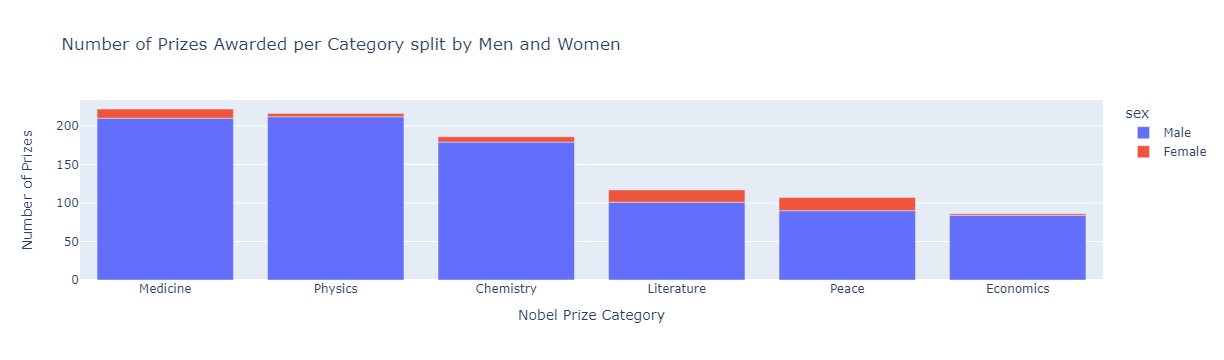

In [22]:
fig_bar = px.bar(data_frame=category_by_sex, 
                 x='category', 
                 y='count', 
                 color='sex', 
                 title='Number of Prizes Awarded per Category split by Men and Women', 
                 hover_name='sex')
fig_bar.update_layout(xaxis={'categoryorder':'total descending'}, #order for biggest to smallest
                  xaxis_title='Nobel Prize Category', yaxis_title='Number of Prizes')
fig_bar.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [23]:
# Create locators for ticks on the time axis
years = np.arange(1900, 2021, 5)
years

array([1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950,
       1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005,
       2010, 2015, 2020])

In [24]:
prizes_by_year = df_data.groupby(by='year').count()['prize']
prizes_by_year

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [25]:
prizes_roll = prizes_by_year.rolling(window=5).mean()
prizes_roll

year
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905    6.20
        ... 
2016   11.60
2017   12.00
2018   12.00
2019   12.20
2020   12.40
Name: prize, Length: 117, dtype: float64

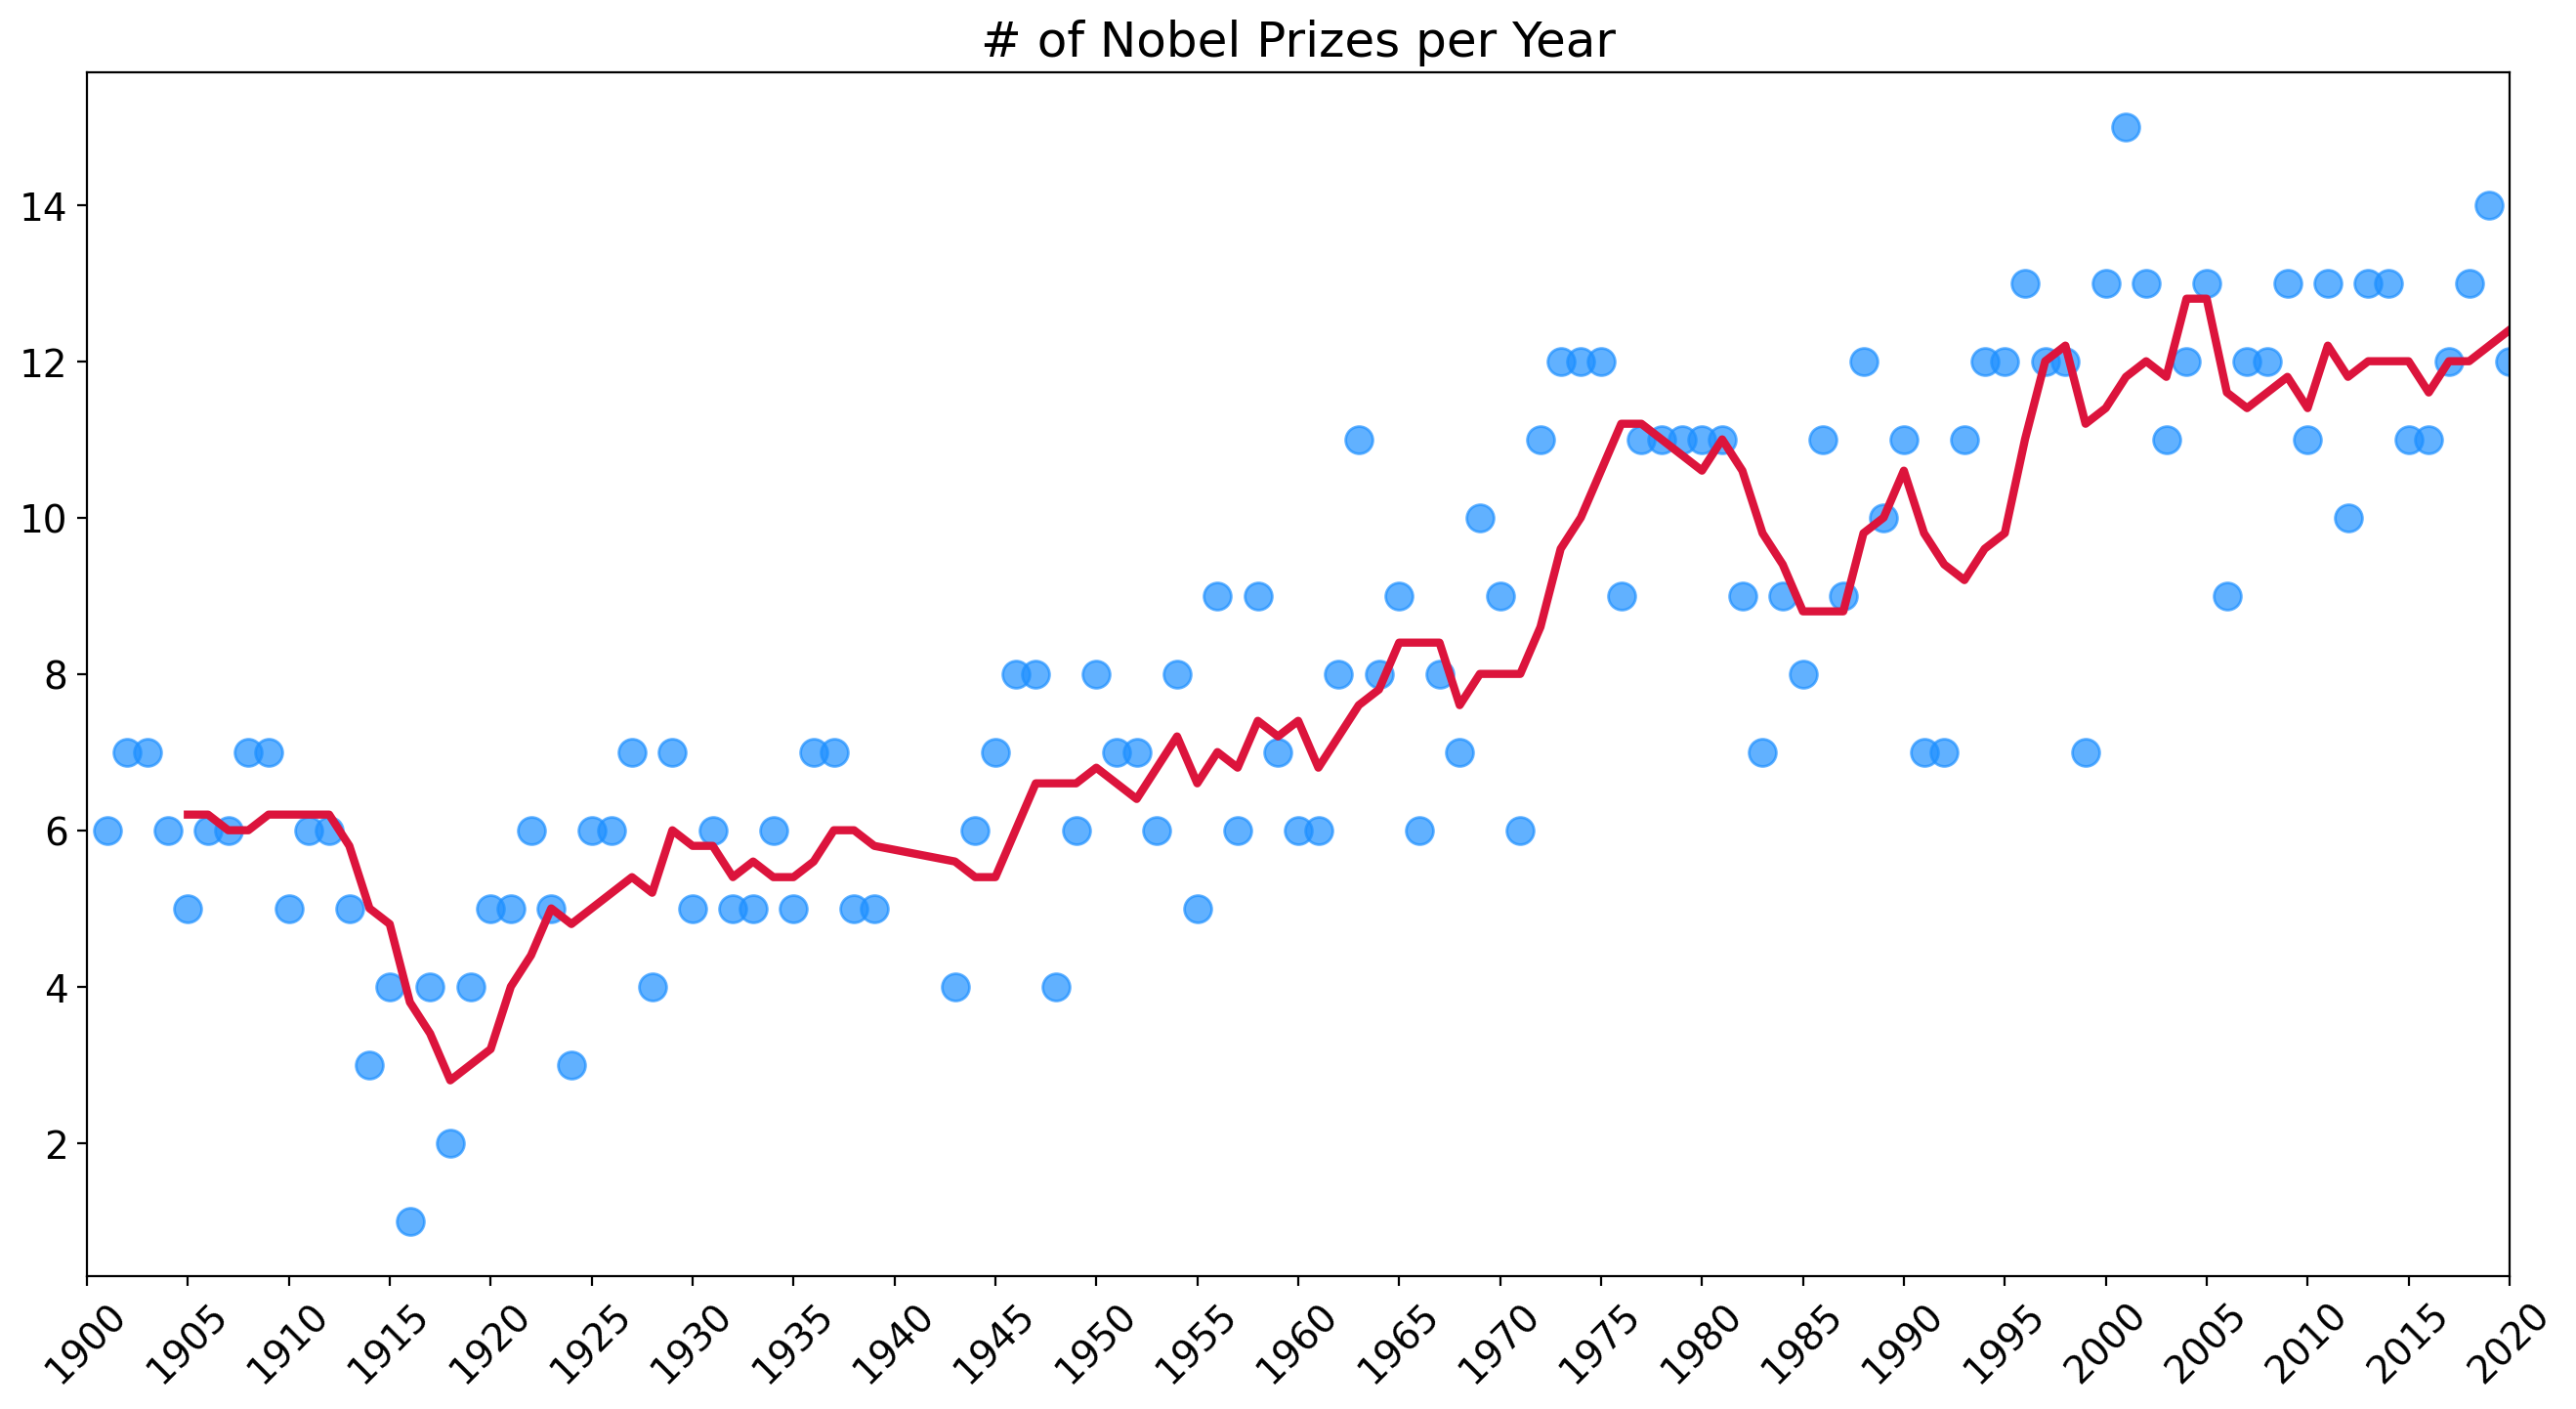

In [26]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('# of Nobel Prizes per Year', fontsize=18)
plt.xticks(ticks=years, fontsize=14, rotation=45) # create ticks each 5 years
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax1.set_xlim(1900, 2020)

ax1.scatter(prizes_by_year.index, 
            prizes_by_year.values, 
            c='dodgerblue', 
            alpha=0.7, 
            s=100)
ax1.plot(prizes_roll.index, 
         prizes_roll.values, 
         c='crimson', 
         linewidth=3)
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [27]:
prizes_shared = df_data.groupby('year').agg({'share_pct':pd.Series.mean})
prizes_shared

share_pct
year           
1901       0.83
1902       0.71
1903       0.71
1904       0.83
1905       1.00
...         ...
2016       0.55
2017       0.50
2018       0.46
2019       0.43
2020       0.50

[117 rows x 1 columns]

In [28]:
prizes_shared_roll = prizes_shared.rolling(window=5).mean()
prizes_shared_roll

share_pct
year           
1901        NaN
1902        NaN
1903        NaN
1904        NaN
1905       0.82
...         ...
2016       0.52
2017       0.50
2018       0.50
2019       0.50
2020       0.49

[117 rows x 1 columns]

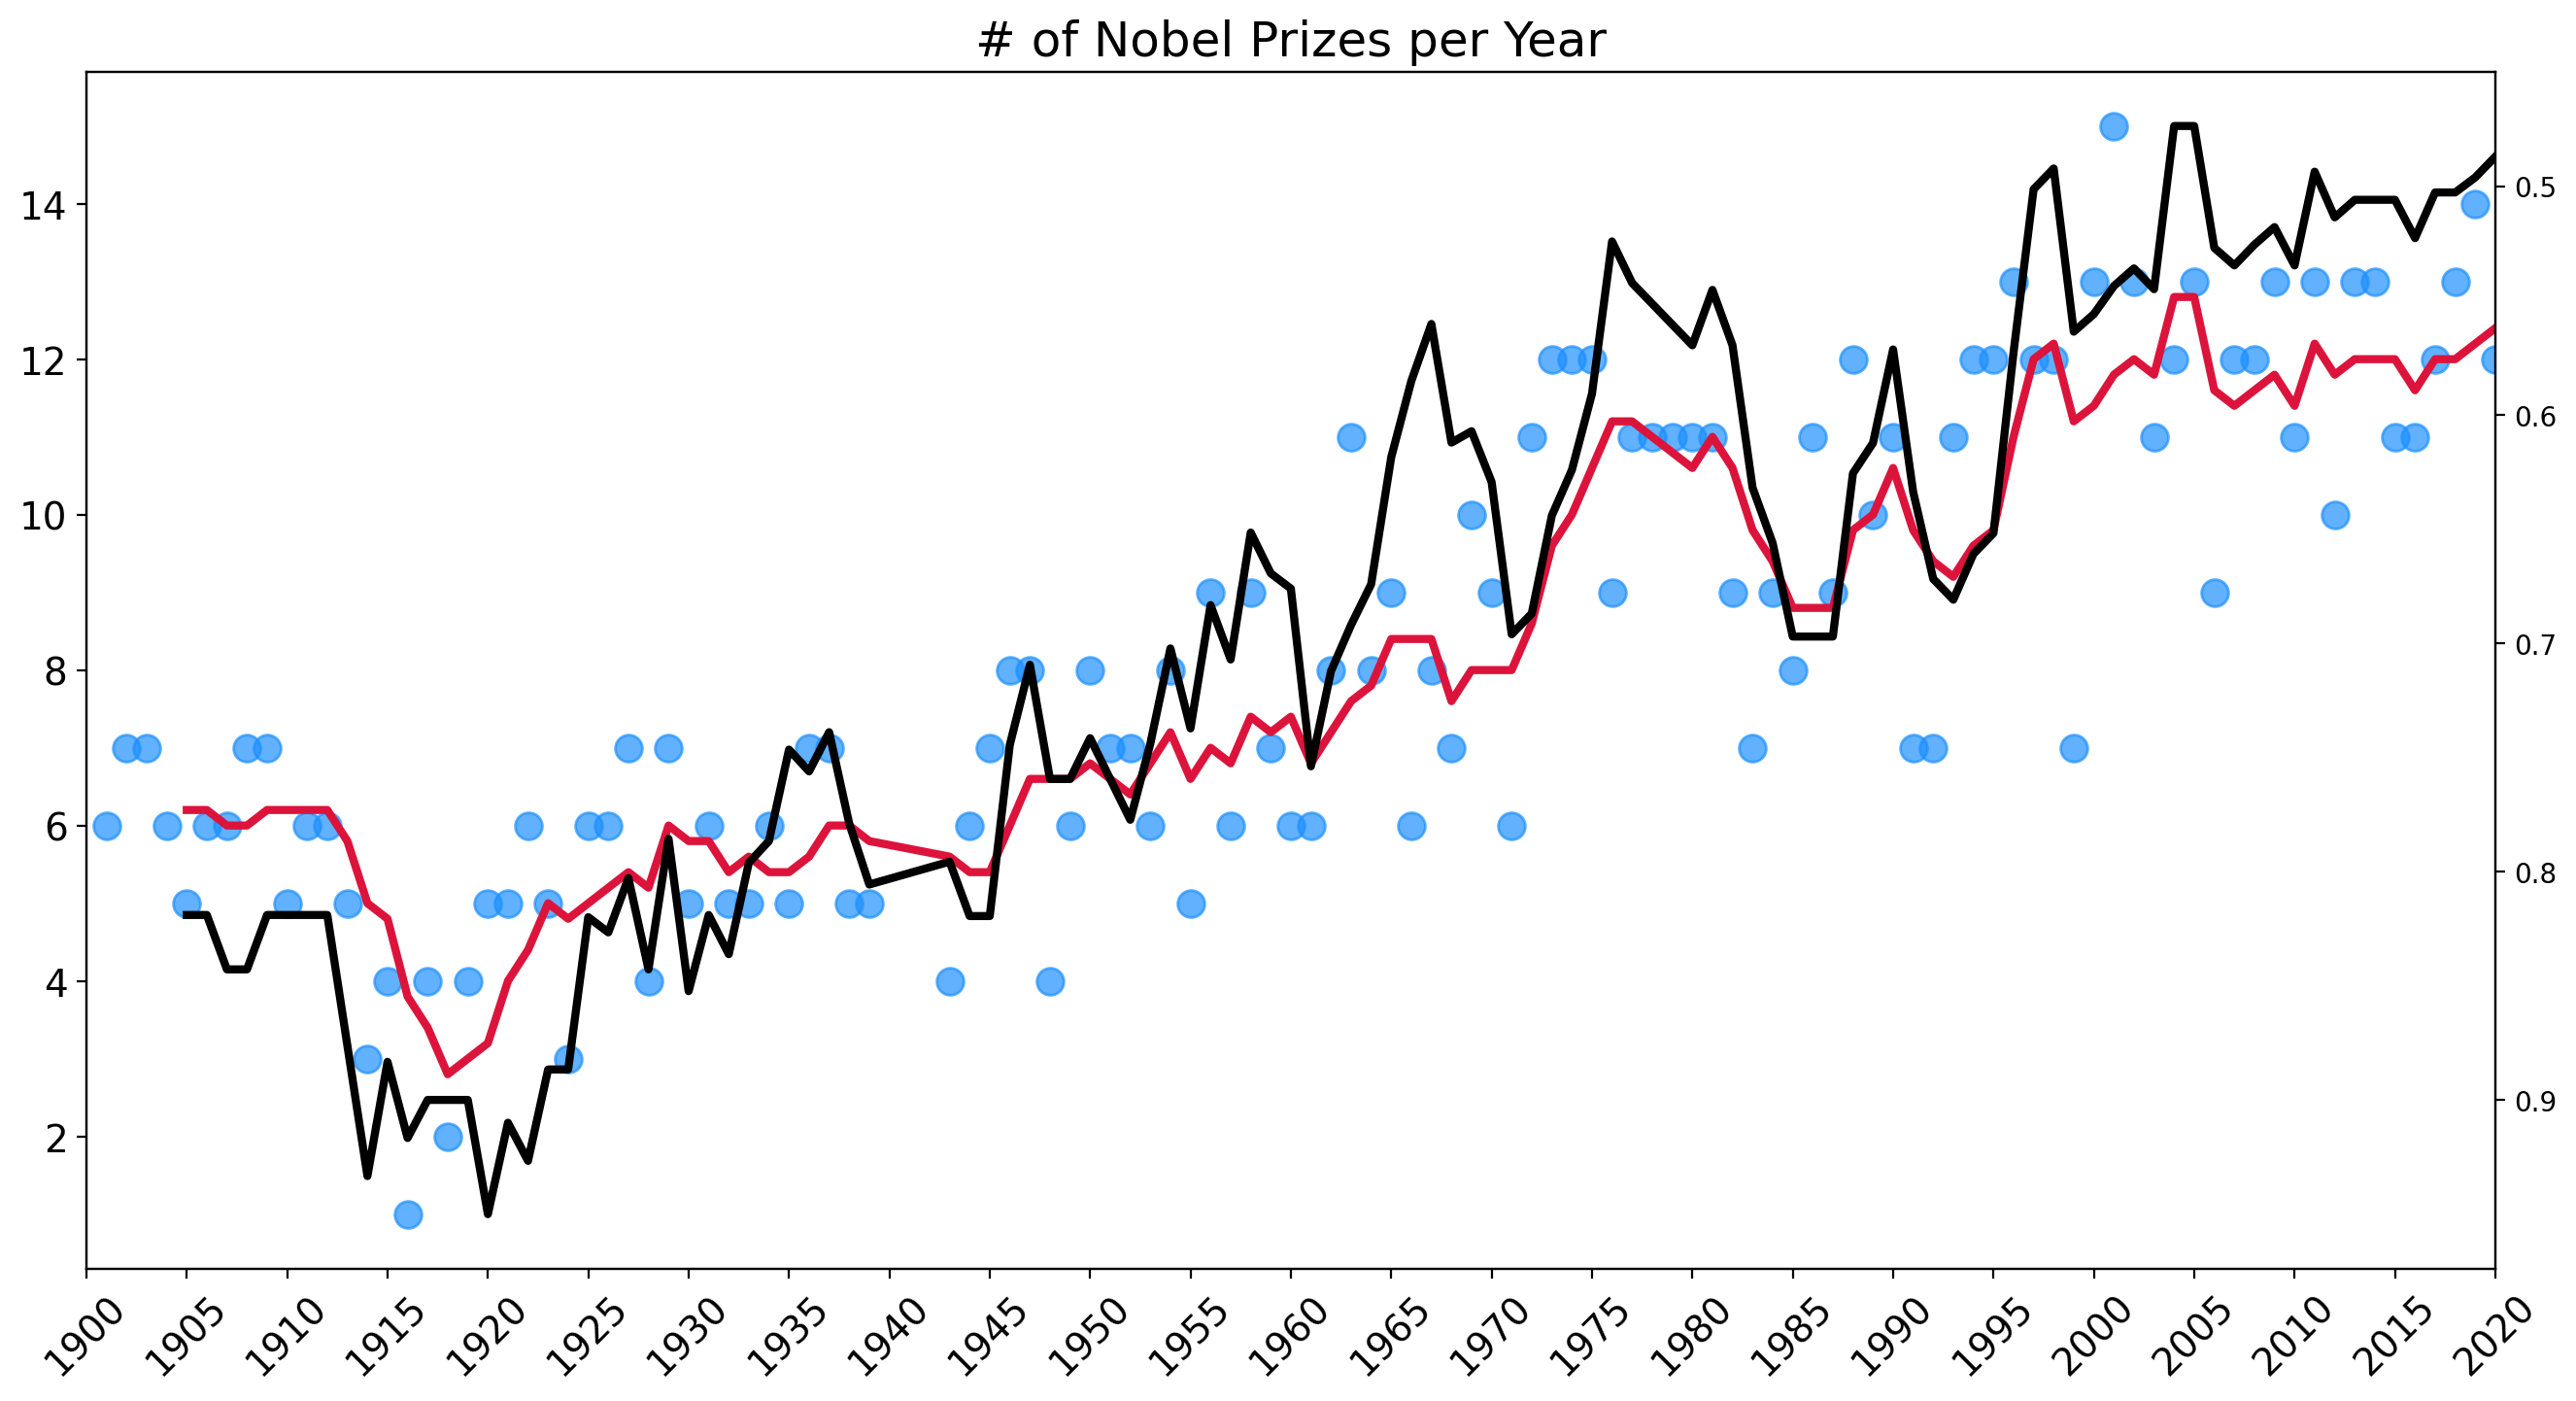

In [29]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('# of Nobel Prizes per Year', fontsize=18)
plt.xticks(ticks=years, fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlim(1900, 2020)
# Invert the yaxis of ax2
ax2.invert_yaxis()

ax1.scatter(prizes_by_year.index, 
            prizes_by_year.values, 
            c='dodgerblue', 
            alpha=0.7, 
            s=100)
ax1.plot(prizes_roll.index, 
         prizes_roll.values, 
         c='crimson', 
         linewidth=3)
ax2.plot(prizes_shared_roll.index,
         prizes_shared_roll.values, 
         c='black', 
         linewidth=3)
plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [30]:
#top_20_countries = df_data.groupby('organization_country').agg({'prize':pd.Series.count})
top_20_countries = df_data.groupby('birth_country_current').agg({'prize':pd.Series.count})
top_20_countries = top_20_countries.sort_values(by='prize', ascending=False)[:20]
top_20_countries

prize
birth_country_current          
United States of America    281
United Kingdom              105
Germany                      84
France                       57
Sweden                       29
Japan                        27
Poland                       27
Russia                       26
Canada                       20
Switzerland                  19
Italy                        19
Austria                      18
Netherlands                  18
Denmark                      12
China                        12
Norway                       12
Australia                    10
Belgium                       9
India                         9
South Africa                  9

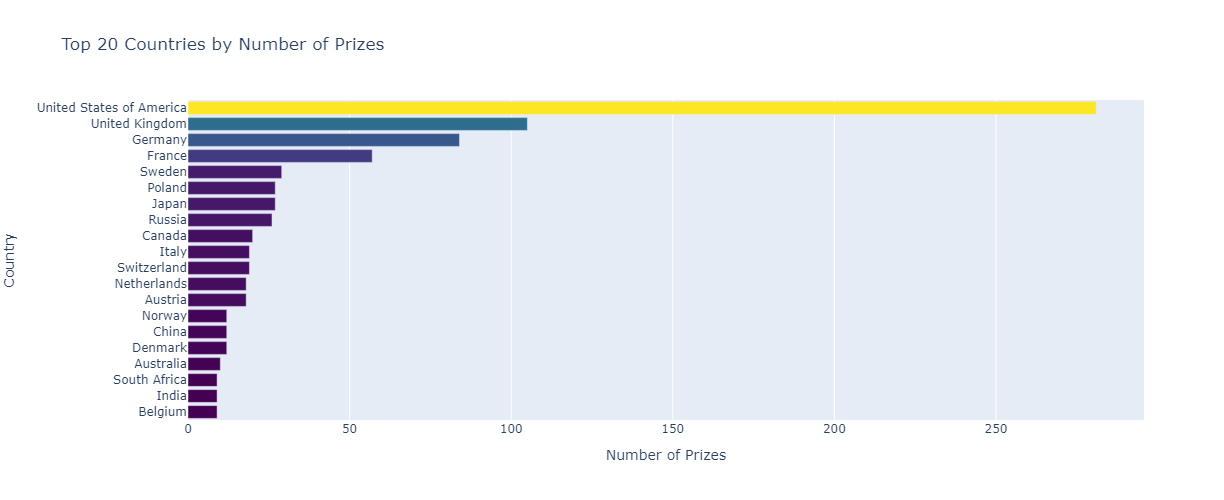

<Figure size 3200x1600 with 0 Axes>

In [31]:
plt.figure(figsize=(16,8), dpi=200)
bar1_h = px.bar(y=top_20_countries.index, 
                x=top_20_countries.prize, 
                orientation='h', 
                title='Top 20 Countries by Number of Prizes', 
                color=top_20_countries.prize, 
                color_continuous_scale='viridis', 
                height=500)
bar1_h.update_layout(xaxis_title='Number of Prizes', 
                     yaxis_title='Country', 
                     coloraxis_showscale=False, 
                     yaxis={'categoryorder':'total ascending'})
bar1_h.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [32]:
top_ISO = df_data.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize':pd.Series.count})
top_ISO = top_ISO.sort_values(by='prize', ascending=False)
top_ISO

birth_country_current  ISO  prize
74  United States of America  USA    281
73            United Kingdom  GBR    105
26                   Germany  DEU     84
25                    France  FRA     57
67                    Sweden  SWE     29
..                       ...  ...    ...
32                   Iceland  ISL      1
47                Madagascar  MDG      1
34                 Indonesia  IDN      1
36                      Iraq  IRQ      1
78                  Zimbabwe  ZWE      1

[79 rows x 3 columns]

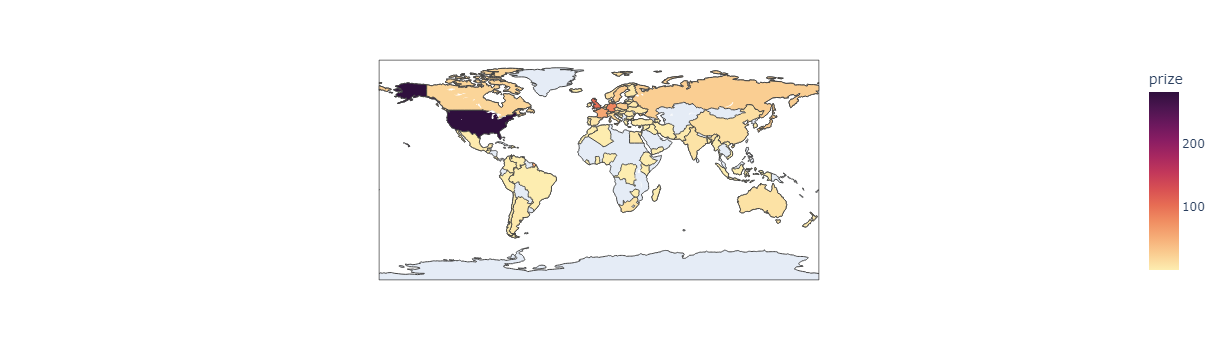

In [33]:
fig_c = px.choropleth(top_ISO, 
                      locations='ISO', 
                      hover_name='birth_country_current', 
                      color='prize', 
                      color_continuous_scale='matter')
fig_c.update_layout(coloraxis_showscale=True)
fig_c.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [34]:
countries_by_cat = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})
countries_by_cat.sort_values(by='prize', ascending=False, inplace=True)

df_merged = pd.merge(countries_by_cat, top_20_countries, on='birth_country_current')

df_merged.columns= ['birth_country_current', 'category', 'cat_prize', 'total_prize']
df_merged.sort_values('total_prize', inplace=True)
df_merged
#total_by_ct = countries_by_cat.groupby('birth_country_current', as_index= False).agg({'cat_prize': pd.Series.sum})
#total_by_ct.rename(columns = {'cat_prize': 'total_prize'}, inplace = True)
#df_categories = countries_by_cat.merge(right=total_by_ct, how='inner', on='birth_country_current').
#sort_values(by=['total_prize','cat_prize'], ascending=[False, False])[:41]
#df_categories

birth_country_current    category  cat_prize  total_prize
108                     India     Physics          1            9
107                     India       Peace          1            9
88               South Africa       Peace          3            9
89               South Africa    Medicine          3            9
90               South Africa  Literature          2            9
..                        ...         ...        ...          ...
4    United States of America       Peace         19          281
3    United States of America   Economics         49          281
2    United States of America   Chemistry         55          281
1    United States of America     Physics         70          281
0    United States of America    Medicine         78          281

[109 rows x 4 columns]

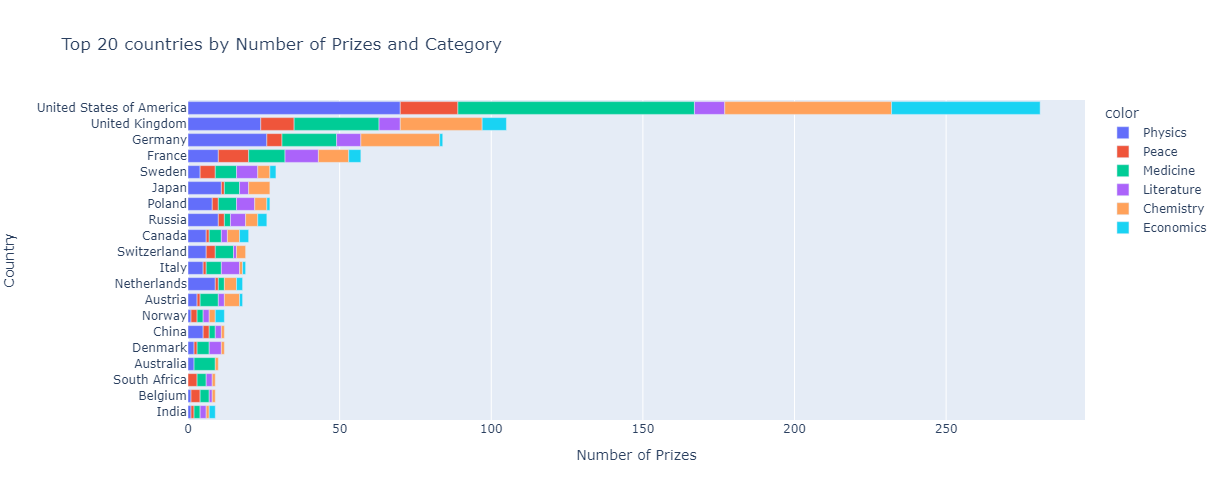

<Figure size 3200x1600 with 0 Axes>

In [35]:
plt.figure(figsize=(16,8), dpi=200)
bar2_h = px.bar(y=df_merged.birth_country_current, 
                x=df_merged.cat_prize, 
                orientation='h', 
                title='Top 20 countries by Number of Prizes and Category', 
                color=df_merged.category,  
                height=500)
bar2_h.update_layout(xaxis_title='Number of Prizes', 
                   yaxis_title='Country', 
                   yaxis={'categoryorder':'total ascending'})
bar2_h.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [36]:
prizes_by_year = df_data[['year', 'birth_country_current', 'prize']].groupby(['year', 'birth_country_current'], as_index=False).count()
prizes_by_year = prizes_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

In [37]:
cumulative_prizes = prizes_by_year.groupby(by=['year', 'birth_country_current']).sum().groupby(level=[1]).cumsum()
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes

year     birth_country_current  prize
0    1901                    France      2
1    1901                   Germany      1
2    1901               Netherlands      1
3    1901                    Poland      1
4    1901               Switzerland      1
..    ...                       ...    ...
622  2019  United States of America    274
623  2020                    France     57
624  2020                   Germany     84
625  2020            United Kingdom    105
626  2020  United States of America    281

[627 rows x 3 columns]

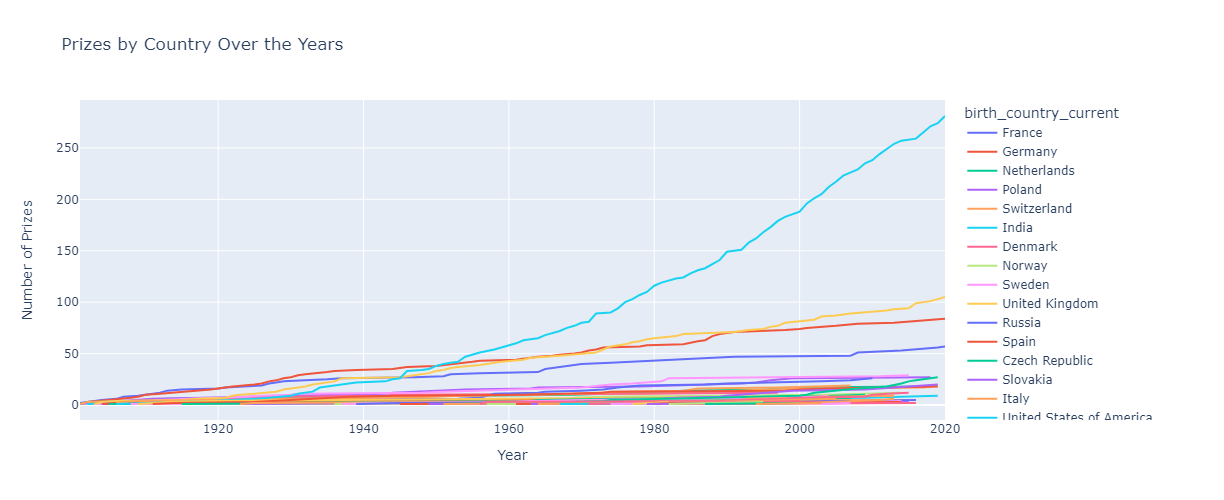

In [38]:
fig = px.line(cumulative_prizes, 
              x="year", 
              y="prize", 
              color='birth_country_current', 
              hover_data='birth_country_current',
              title='Prizes by Country Over the Years', 
              height=500)
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Prizes')
fig.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [39]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'share_pct'],
      dtype='object')

In [40]:
top20_org = df_data['organization_name'].value_counts()
g_top20_org = top20_org.sort_values(ascending=False)[:20]
g_top20_org

organization_name
University of California                        40
Harvard University                              29
Stanford University                             23
Massachusetts Institute of Technology (MIT)     21
University of Chicago                           20
University of Cambridge                         18
Columbia University                             17
California Institute of Technology (Caltech)    17
Princeton University                            15
Rockefeller University                          13
Max-Planck-Institut                             13
University of Oxford                            12
MRC Laboratory of Molecular Biology             10
Yale University                                  9
Cornell University                               8
Bell Laboratories                                8
Sorbonne University                              7
University College London                        7
London University                                7
Harvard Medic

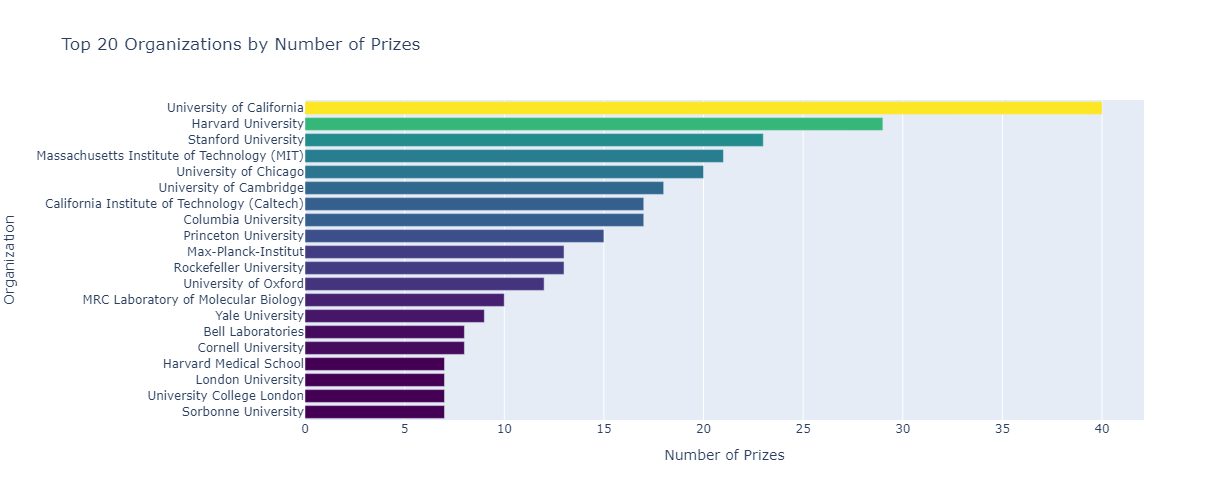

<Figure size 3200x1600 with 0 Axes>

In [41]:
plt.figure(figsize=(16,8), dpi=200)
bar3_h = px.bar(y=g_top20_org.index,
                x=g_top20_org.values, 
                orientation='h', 
                title='Top 20 Organizations by Number of Prizes', 
                color=g_top20_org.values, 
                color_continuous_scale='viridis', 
                height=500)
bar3_h.update_layout(xaxis_title='Number of Prizes', 
                     yaxis_title='Organization', 
                     yaxis={'categoryorder':'total ascending'},
                     coloraxis_showscale=False)
bar3_h.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [42]:
top20_city = df_data['organization_city'].value_counts()
g_top20_city = top20_city.sort_values(ascending=False)[:20]
g_top20_city

organization_city
Cambridge, MA      50
New York, NY       45
Cambridge          31
London             27
Paris              25
Stanford, CA       24
Berkeley, CA       21
Chicago, IL        20
Princeton, NJ      19
Pasadena, CA       17
Oxford             12
Berlin             12
Stockholm          10
Moscow             10
New Haven, CT       9
Heidelberg          9
Boston, MA          9
Munich              9
Los Angeles, CA     8
Ithaca, NY          8
Name: count, dtype: int64

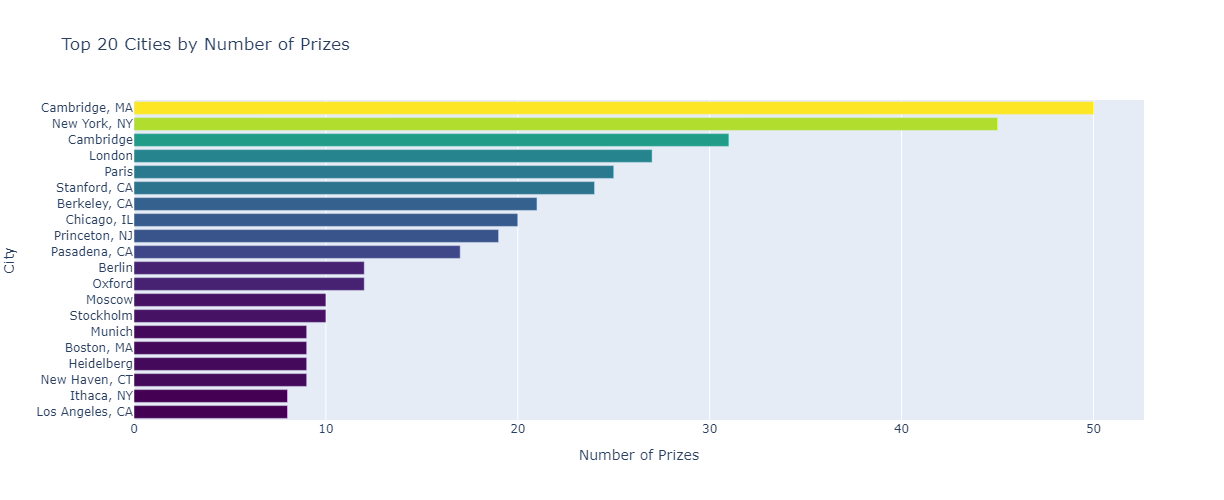

<Figure size 3200x1600 with 0 Axes>

In [43]:
plt.figure(figsize=(16,8), dpi=200)
bar4_h = px.bar(y=g_top20_city.index, 
                x=g_top20_city.values, 
                orientation='h', 
                title='Top 20 Cities by Number of Prizes', 
                color=g_top20_city.values, 
                color_continuous_scale='viridis', 
                height=500)
bar4_h.update_layout(xaxis_title='Number of Prizes', 
                     yaxis_title='City', 
                     yaxis={'categoryorder':'total ascending'},
                     coloraxis_showscale=False)
bar4_h.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [44]:
top20_birthcity = df_data['birth_city'].value_counts()
g_top20_birthcity = top20_birthcity.sort_values(ascending=False)[:20]
g_top20_birthcity

birth_city
New York, NY             53
Paris                    26
London                   19
Vienna                   14
Chicago, IL              12
Berlin                   11
Washington, DC            8
Brooklyn, NY              8
Budapest                  8
Boston, MA                8
Munich                    7
Moscow                    7
Stockholm                 6
Hamburg                   6
Frankfurt-on-the-Main     5
Prague                    5
Pittsburgh, PA            4
Montreal                  4
Cairo                     4
Dublin                    3
Name: count, dtype: int64

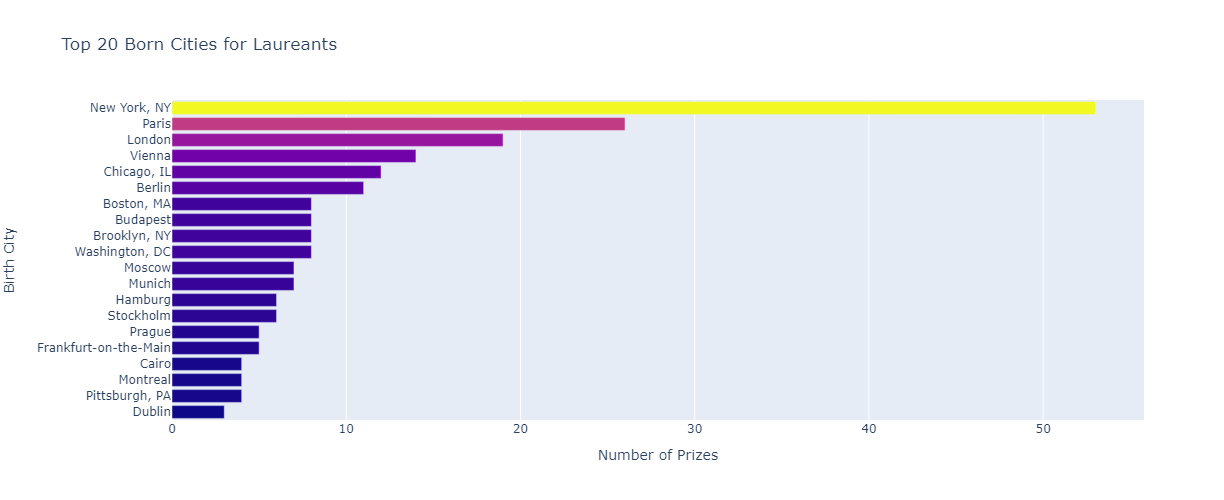

<Figure size 3200x1600 with 0 Axes>

In [45]:
plt.figure(figsize=(16,8), dpi=200)
bar5_h = px.bar(y=g_top20_birthcity.index, 
                x=g_top20_birthcity.values, 
                orientation='h', 
                title='Top 20 Born Cities for Laureants', 
                color=g_top20_birthcity.values, 
                color_continuous_scale='plasma', 
                height=500)
bar5_h.update_layout(xaxis_title='Number of Prizes', 
                     yaxis_title='Birth City', 
                     yaxis={'categoryorder':'total ascending'},
                     coloraxis_showscale=False)
bar5_h.show()

In [46]:
(g_top20_birthcity.loc['New York, NY']/top_20_countries.loc['United States of America'][0]) * 100

18.86120996441281

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [47]:
df_organization = df_data.groupby(['organization_country', 'organization_city', 'organization_name'], as_index=False).agg({'prize': pd.Series.count})
df_organization.sort_values(by='prize', ascending=False, inplace=True)
df_organization

organization_country     organization_city  \
205  United States of America         Cambridge, MA   
280  United States of America          Stanford, CA   
206  United States of America         Cambridge, MA   
209  United States of America           Chicago, IL   
195  United States of America          Berkeley, CA   
..                        ...                   ...   
110                     Japan               Sapporo   
111                     Japan                 Tokyo   
112                     Japan                 Tokyo   
113                     Japan                 Tokyo   
290  United States of America  Yorktown Heights, NY   

                               organization_name  prize  
205                           Harvard University     29  
280                          Stanford University     23  
206  Massachusetts Institute of Technology (MIT)     21  
209                        University of Chicago     20  
195                     University of California     19  
..                                           ...    ...  
110                          Hokkaido University      1  
111                      Asahi Kasei Corporation      1  
112                          Kitasato University      1  
113                Tokyo Institute of Technology      1  
290         IBM Thomas J. Watson Research Center      1  

[291 rows x 4 columns]

In [48]:
fig_sbt = px.sunburst(df_organization, 
                  path=['organization_country', 'organization_city', 'organization_name'], 
                  values='prize',
                  title='Where do Discoveries Take Place?')
fig_sbt.update_layout(xaxis_title='Number of Prizes',
                     yaxis_title='City',
                     coloraxis_showscale=False)
fig_sbt.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [49]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO', 'share_pct'],
      dtype='object')

In [50]:
df_data['winning_age'] = pd.to_numeric(df_data['year'] - df_data['birth_date'].dt.year)
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  winning_age  
0            Berlin              Germany  NLD       1.00        49.00  
1               NaN                  NaN  FRA       1.00        62.00  
2           Marburg              Germany  POL       1.00        47.00  
3               NaN                  NaN  FRA       0.50        79.00  
4               NaN                  NaN  CHE       0.50        73.00

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [51]:
df_data.sort_values(by='winning_age')[['full_name', 'winning_age', 'category']].head(10)

full_name  winning_age  category
885           Malala Yousafzai        17.00     Peace
85      William Lawrence Bragg        25.00   Physics
932                Nadia Murad        25.00     Peace
305       Tsung-Dao (T.D.) Lee        31.00   Physics
171  Paul Adrien Maurice Dirac        31.00   Physics
166     Werner Karl Heisenberg        31.00   Physics
188        Carl David Anderson        31.00   Physics
333    Rudolf Ludwig Mössbauer        32.00   Physics
849            Tawakkol Karman        32.00     Peace
115    Frederick Grant Banting        32.00  Medicine

In [52]:
df_data.sort_values(by='winning_age', ascending=False)[['full_name', 'winning_age', 'category']].head(10)

full_name  winning_age    category
937     John Goodenough        97.00   Chemistry
933       Arthur Ashkin        96.00     Physics
794      Leonid Hurwicz        90.00   Economics
961       Roger Penrose        89.00     Physics
856    Lloyd S. Shapley        89.00   Economics
745   Raymond Davis Jr.        88.00     Physics
796       Doris Lessing        88.00  Literature
374         Peyton Rous        87.00    Medicine
658      Joseph Rotblat        87.00       Peace
757  Vitaly L. Ginzburg        87.00     Physics

In [470]:
df_data.describe()

year                     birth_date  share_pct  winning_age
count   962.00                            934     962.00       934.00
mean  1,971.82  1912-03-28 22:50:37.259100672       0.63        59.95
min   1,901.00            1817-11-30 00:00:00       0.25        17.00
25%   1,948.00            1892-04-06 00:00:00       0.33        51.00
50%   1,977.00            1917-10-30 12:00:00       0.50        60.00
75%   2,001.00            1937-04-24 18:00:00       1.00        69.00
max   2,020.00            1997-07-12 00:00:00       1.00        97.00
std      33.81                            NaN       0.29        12.62

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

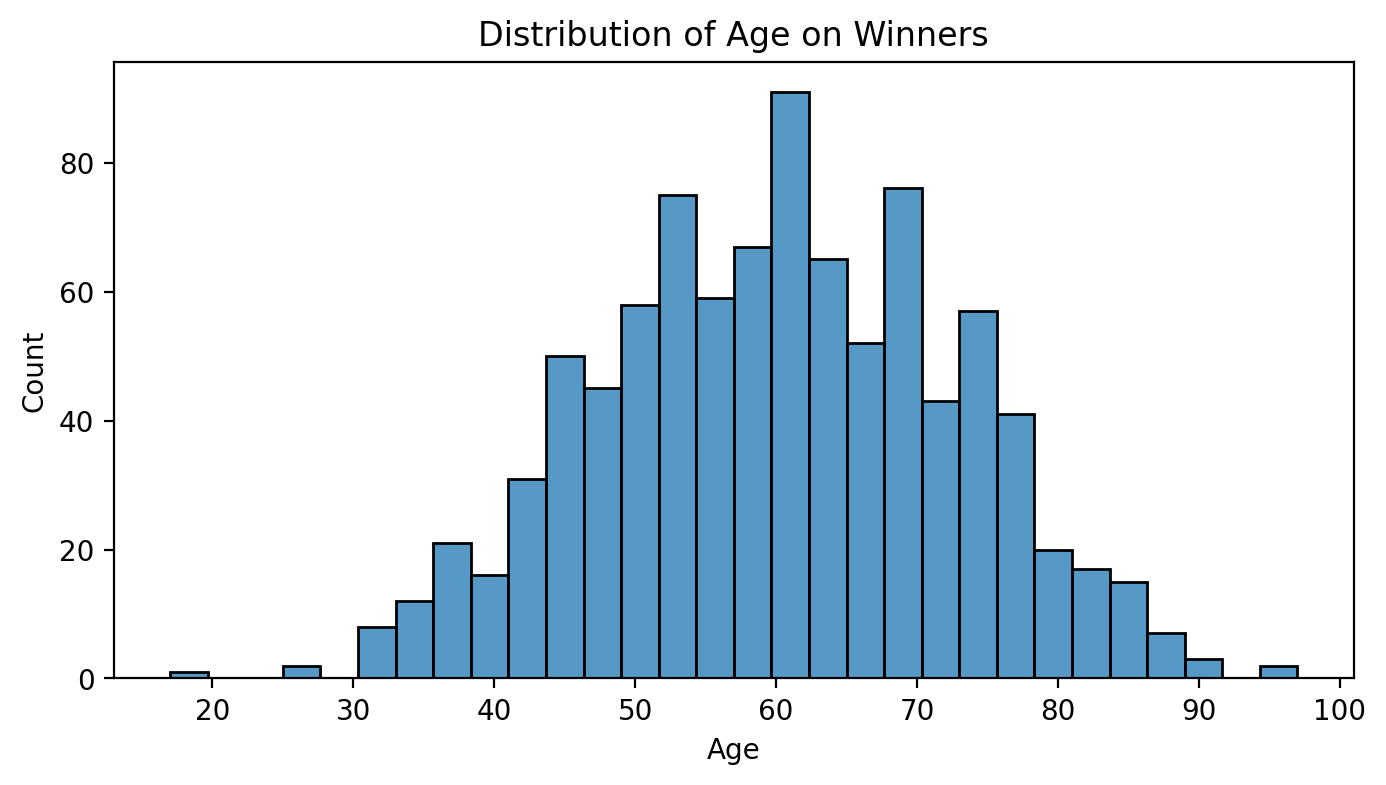

In [53]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(df_data, 
             x=df_data['winning_age'], 
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Winners')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


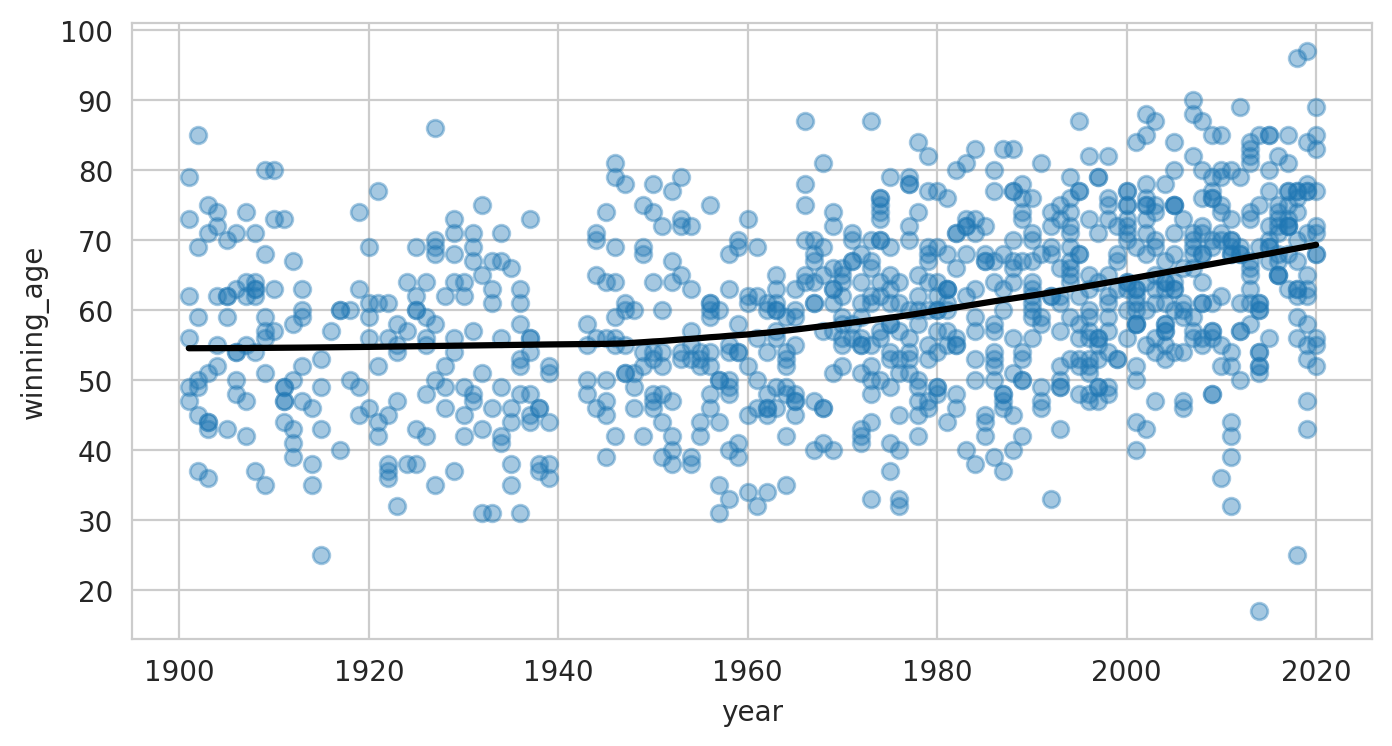

In [54]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('whitegrid'):
    sns.regplot(df_data,
               x='year',
               y='winning_age',
               lowess=True,
               scatter_kws = {'alpha': 0.4},
               line_kws={'color': 'black'})
plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

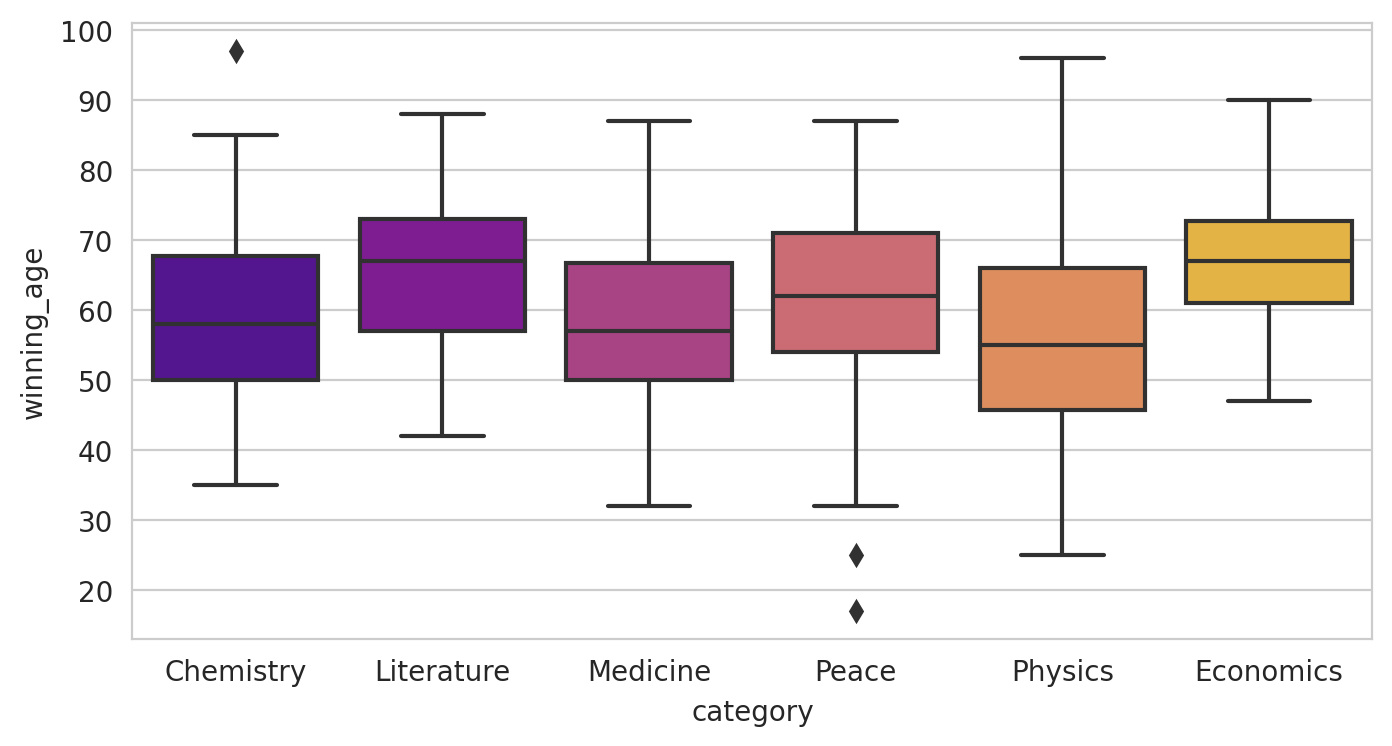

In [57]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
    sns.boxplot(df_data,
                x='category',
                y='winning_age',
                palette='plasma'
        
    )

plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


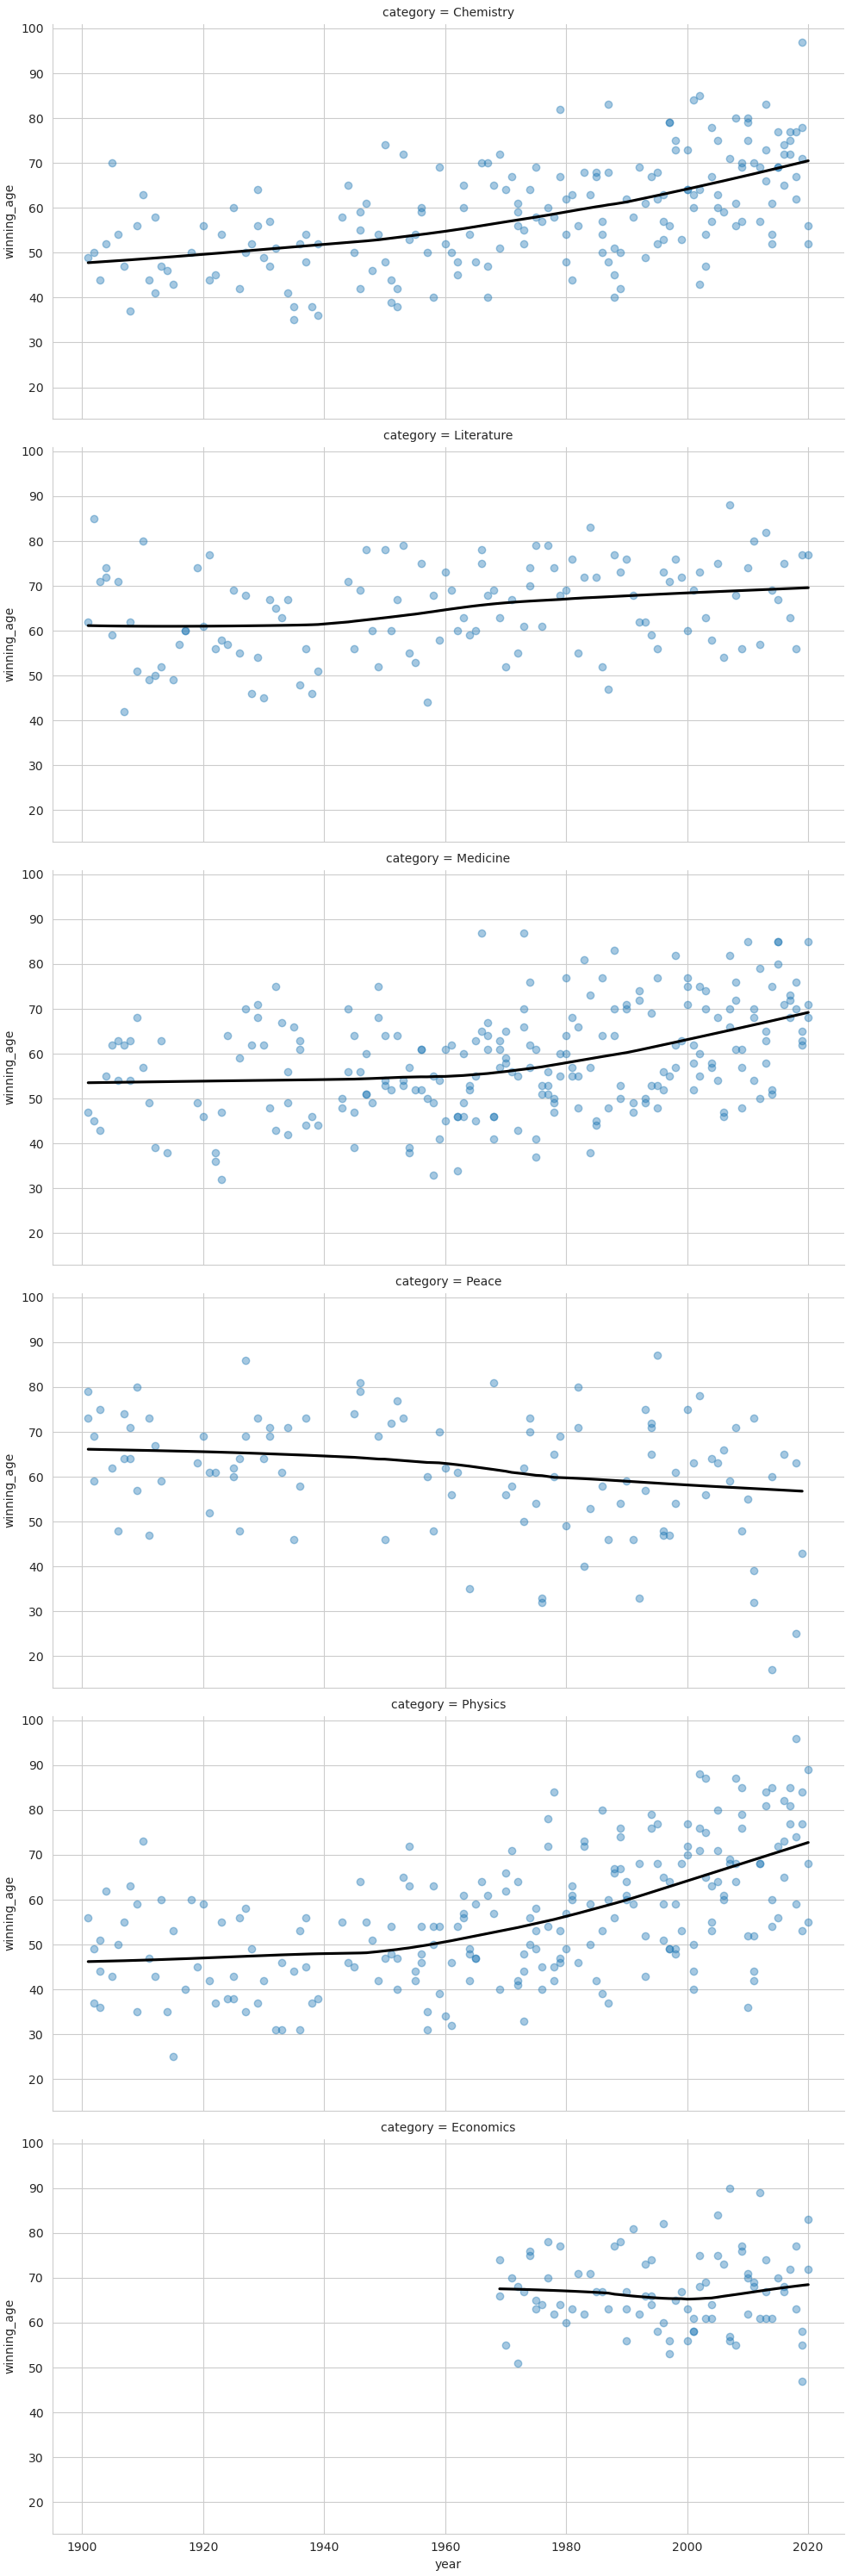

In [62]:
with sns.axes_style('whitegrid'):
    sns.lmplot(df_data,
               x='year',
               y='winning_age',
               lowess=True,
               row='category',
               aspect=2,
               scatter_kws = {'alpha': 0.4},
               line_kws={'color': 'black'}
    )
plt.show()

<Figure size 1600x800 with 0 Axes>

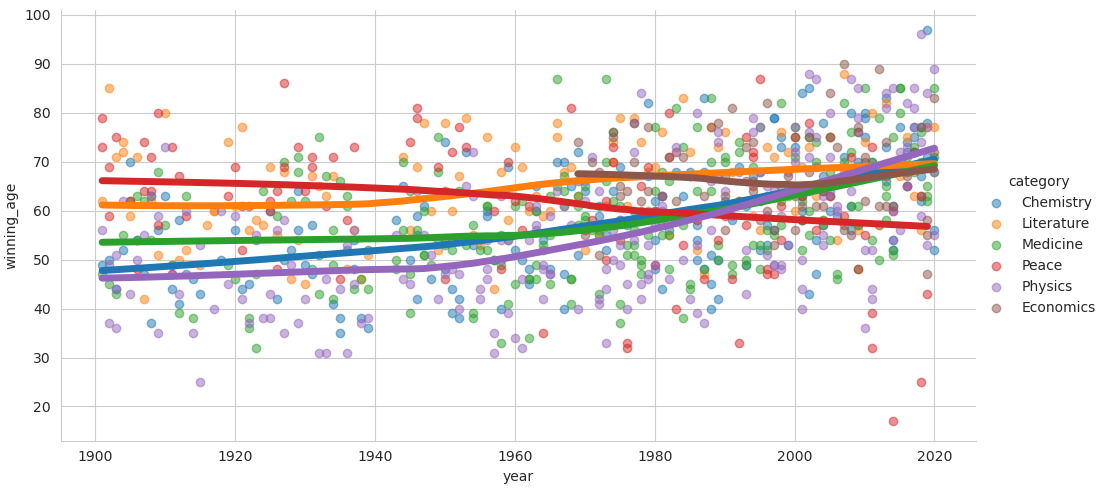

In [63]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
    sns.lmplot(df_data,
               x='year',
               y='winning_age',
               lowess=True,
               hue='category',
               aspect=2,
               scatter_kws = {'alpha': 0.5},
               line_kws={'linewidth': 5}
    )
plt.show()